In [54]:
url="https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/train_titanic.csv"

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_data_set = pd.read_csv(url,error_bad_lines=False)
titanic_data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Veamos cuantos datos son nulos

In [56]:
titanic_data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
woman_lifes=titanic_data_set.loc[titanic_data_set.Sex=="female"]["Survived"]
Num_woman=len(woman_lifes)
tasa_supervivencia=woman_lifes.sum()/Num_woman
tasa_supervivencia

0.7420382165605095

In [58]:
men_lifes=titanic_data_set.loc[titanic_data_set.Sex=="male"]["Survived"]
Num_men=len(men_lifes)
tasa_supervivencia=men_lifes.sum()/Num_men
tasa_supervivencia

0.18890814558058924

In [59]:
titanic_data_set["name_survived"]=titanic_data_set["Survived"].map({0:"No_survived",1:"Survived"})


/home/usuario/Documentos/Platzi/Analisis_Exploratorio_Datos/env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

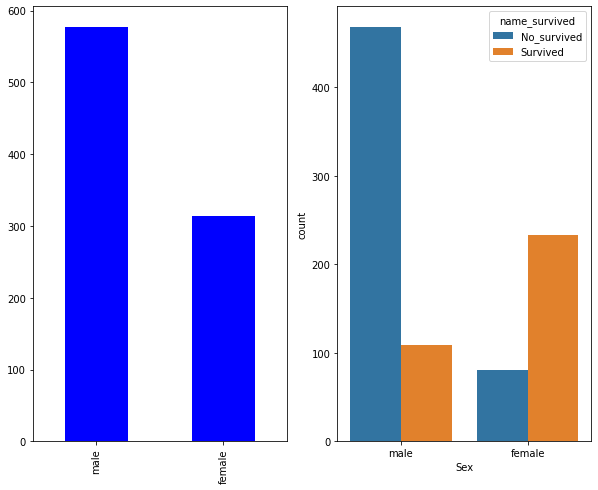

In [60]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
titanic_data_set["Sex"].value_counts().plot.bar(color="blue",ax=ax[0])
sns.countplot("Sex",hue="name_survived",data=titanic_data_set)

In [68]:
tamano_pasajeros=len(titanic_data_set["Age"])

In [61]:
moda=titanic_data_set["Age"].mode()

titanic_data_set["Age"].loc[titanic_data_set["Age"].isnull()==True]=moda

titanic_data_set.head(10)


/home/usuario/Documentos/Platzi/Analisis_Exploratorio_Datos/env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No_survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No_survived
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,No_survived
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,No_survived
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,No_survived
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Survived
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Survived


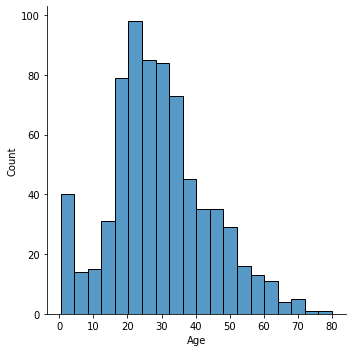

In [71]:
sns.displot(titanic_data_set["Age"])

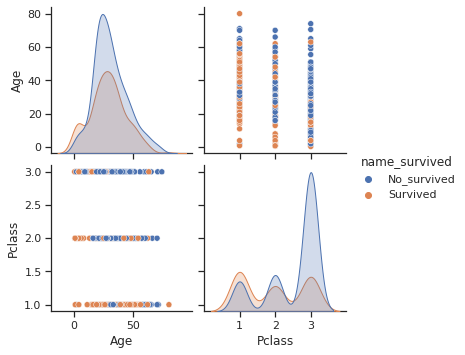

In [75]:
sns.set(style="ticks",color_codes=True)
sns.pairplot(data=titanic_data_set,vars=["Age","Pclass"],hue="name_survived")

<AxesSubplot:>

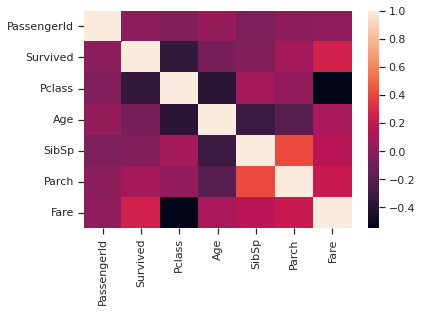

In [77]:
corr_titanic=titanic_data_set.corr(method="pearson")
sns.heatmap(corr_titanic)